In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import date
import matplotlib
from sklearn.preprocessing import Normalizer, StandardScaler

In [2]:
def read_deepface_representation(kdv_csv, ID_csv):
    #kdv_deepface_csv = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien\representations\kdv-patients-deepface-cropped.csv"
    #ID_deepface_csv  = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien\representations\ID-controls-deepface-cropped.csv"

    data = []
    labels = []

    # get the representations from Excel files kdv
    with open (kdv_csv, newline='') as file:
        reader = csv.reader(file, delimiter=',')
        for row in reader:
            rep = list(map(float, row[1:]))
            data.append(rep)
            labels.append(1)

    # get the representations from Excel files ID control
    with open (ID_csv, newline='') as file:
        reader = csv.reader(file, delimiter=',')
        for row in reader:
            rep = list(map(float, row[1:]))
            data.append(rep)
            labels.append(0)

    print("All image representations are read in.")
    
    return np.array(data), np.array(labels)

In [3]:
def plot_pca_tsne(data, labels, lowest_age = -1, highest_age = -1):
    
    X_tsne = TSNE(n_components=2, init='pca').fit_transform(data)
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    
    fig = plt.figure(figsize=(8,8))
    
    for i, u in enumerate(X_tsne):
        if labels[i] == 0:
            x0.append(X_tsne[i, 0])
            y0.append(X_tsne[i, 1])
        else:
            x1.append(X_tsne[i, 0])
            y1.append(X_tsne[i, 1])
    
    plt.scatter(x0, y0, marker=".", label = 'Control')
    plt.scatter(x1, y1, marker="x", label = 'KdVS')
                
    plt.legend()
    plt.title("t-SNE plot of age group {}-{}".format(lowest_age, highest_age))
    plt.savefig("t-sNE_plot_age_group_{}_{}".format(lowest_age, highest_age))
    plt.show()

All image representations are read in.


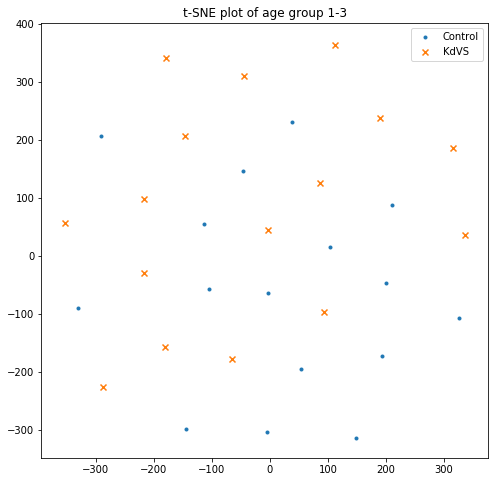

All image representations are read in.


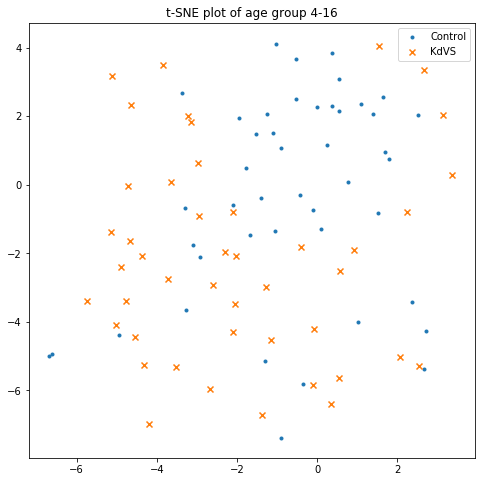

All image representations are read in.


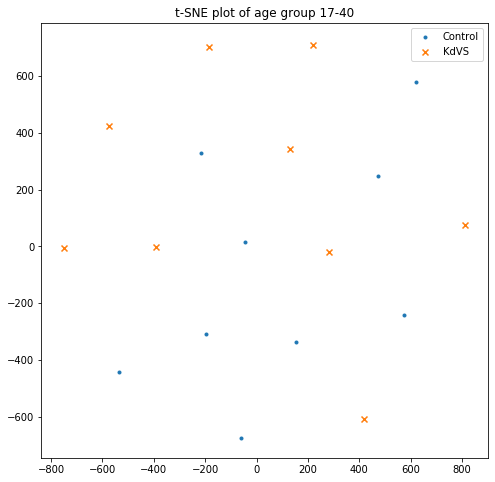

In [4]:
age_ranges = [[1,3],[4,16],[17,40]]

for age_range in age_ranges:
    lowest_age = age_range[0]
    highest_age = age_range[1]

    kdv_csv = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien\representations\kdv-patients-deepface-cropped-age-group-"+str(lowest_age)+"-"+str(highest_age)+".csv"    
    ID_csv  = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien\representations\ID-controls-deepface-cropped-age-group-"+str(lowest_age)+"-"+str(highest_age)+".csv"

    data, labels =  read_deepface_representation(kdv_csv, ID_csv)
    data = Normalizer().transform(data)

    plot_pca_tsne(data, labels, lowest_age, highest_age)
    